<a href="https://colab.research.google.com/github/avbalwin/S2-Codebase/blob/main/Experiment_No_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No.4

Evaluating Divergence and curl of a vector field and visualize

**Case :** Find the Divergence and curl of the vector field $F=xy  \textbf{i}+yz \textbf{j}+zx \textbf{k}$ and plot the vector fileds.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

#N = CoordSys3D('N')

In [ ]:
# Define the coordinate system
N = sp.vector.CoordSys3D('n')
#Define the Vector field
F = (N.x*N.y)*N.i+(N.y*N.z)*N.j+(N.z*N.x)*N.k
F

n.x*n.y*n.i + n.y*n.z*n.j + n.x*n.z*n.k

In [ ]:
#Compute the divergence
divergence_f=sp.vector.divergence(F)
divergence_f

n.x + n.y + n.z

In [15]:
# Compute the curl
curl_F = sp.vector.curl(F)
curl_F

(-n.y)*n.i + (-n.z)*n.j + (-n.x)*n.k

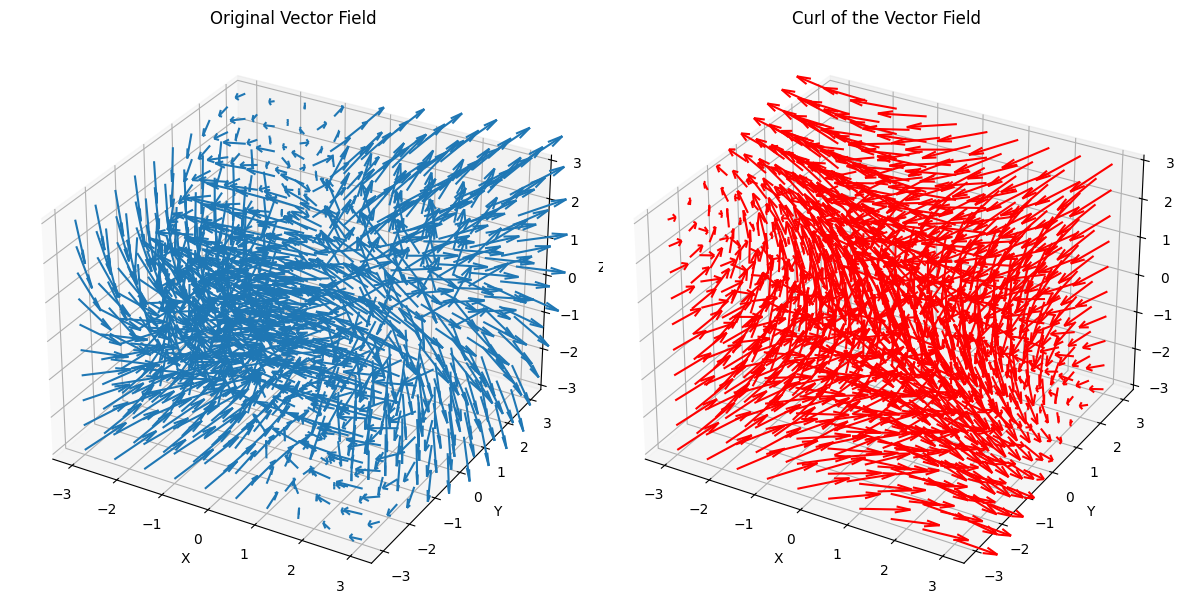

In [16]:
# Define the grid
x_vals = np.linspace(-3, 3, 10)
y_vals = np.linspace(-3, 3, 10)
z_vals = np.linspace(-3, 3, 10)
X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals)

# Initialize arrays to store the vector field components
U = np.zeros_like(X)
V = np.zeros_like(Y)
W = np.zeros_like(Z)

# Initialize arrays to store curl components
Curl_U = np.zeros_like(X)
Curl_V = np.zeros_like(Y)
Curl_W = np.zeros_like(Z)

# Evaluate the vector field and curl at each grid point
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    for k in range(X.shape[2]):
      point = {N.x: X[i,j,k], N.y: Y[i,j,k], N.z: Z[i,j,k]}
      F_evaluated = F.subs(point)
      U[i,j,k] = float(F_evaluated.dot(N.i))
      V[i,j,k] = float(F_evaluated.dot(N.j))
      W[i,j,k] = float(F_evaluated.dot(N.k))
      curl_evaluated = curl_F.subs(point)
      Curl_U[i,j,k] = float(curl_evaluated.dot(N.i))
      Curl_V[i,j,k] = float(curl_evaluated.dot(N.j))
      Curl_W[i,j,k] = float(curl_evaluated.dot(N.k))

#Plot the original vector field
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(X, Y, Z, U, V, W, length=1, normalize=True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Original Vector Field')

# Plot the curl of the vector field
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(X, Y, Z, Curl_U, Curl_V, Curl_W, length=1, normalize=True, color='r')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Curl of the Vector Field')

plt.tight_layout()
plt.show()


### Application Problem: Vorticity and Fluid Flow in a Pipe
#### Problem Statement
Consider a cylindrical pipe through which fluid is flowing. The velocity field of the fluid inside the pipe is described by a three-dimensional vector field $V(x, y, z)=(-y,x,0)$.

(i) Determine the divergence $\nabla.V$,which measures the net rate of fluid flow out of  a point, at any point $(x,y,z)$ in the pipe.

(ii) Determine the curl $\nabla \times V$, which measures the rotation or swirling strength of the fluid around a point

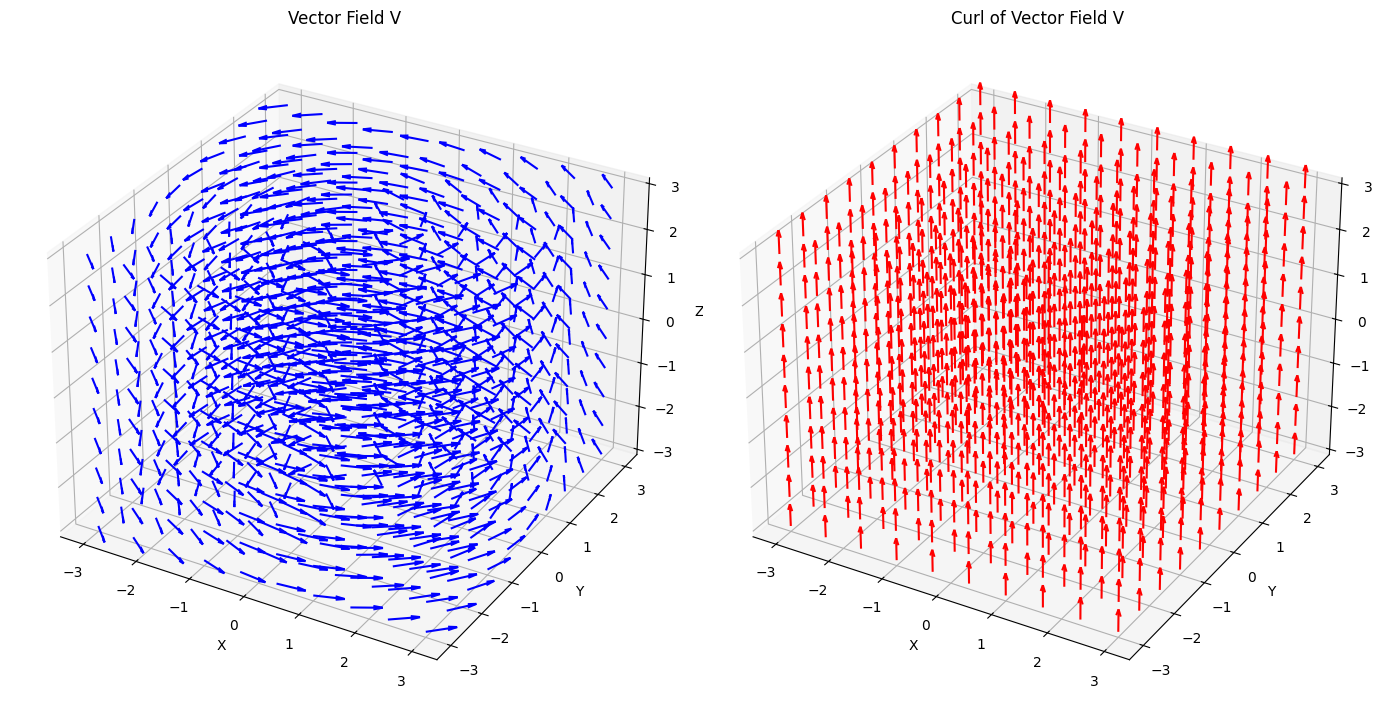

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

U_new = np.zeros_like(X)
V_new = np.zeros_like(Y)
W_new = np.zeros_like(Z)

CurlU_new = np.zeros_like(X)
CurlV_new = np.zeros_like(Y)
CurlW_new = np.zeros_like(Z)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            point = {N.x: X[i,j,k], N.y: Y[i,j,k], N.z: Z[i,j,k]}

            V_evaluated = V.subs(point)
            U_new[i,j,k] = float(V_evaluated.dot(N.i))
            V_new[i,j,k] = float(V_evaluated.dot(N.j))
            W_new[i,j,k] = float(V_evaluated.dot(N.k))


            curl_V_evaluated = curl_V.subs(point)
            CurlU_new[i,j,k] = float(curl_V_evaluated.dot(N.i))
            CurlV_new[i,j,k] = float(curl_V_evaluated.dot(N.j))
            CurlW_new[i,j,k] = float(curl_V_evaluated.dot(N.k))

fig = plt.figure(figsize=(14, 7))


ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(X, Y, Z, U_new, V_new, W_new, length=0.5, normalize=True, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Vector Field V')
ax1.set_aspect('auto')


ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(X, Y, Z, CurlU_new, CurlV_new, CurlW_new, length=0.5, normalize=True, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Curl of Vector Field V')
ax2.set_aspect('auto')

plt.tight_layout()
plt.show()
